https://www.datacamp.com/tutorial/wordcloud-python

In [3]:
#Additional Helper functions can be found in 'src/'

import sys
sys.path.append( '../../src' )
import pandas as pd

from pandas_functions import dataFrame_info
from documentParser import doc_preparer , getTopWordFreq 
from modelingResultPrettyPrinter import prettyPrintGridCVResults, prettyPrintCVScores

from nltk.corpus import stopwords
sw = stopwords.words('english')

In [4]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

## Loading

In [5]:
dataFolder_path = '../../data/'
data_df = pd.read_csv(dataFolder_path+'judge_1377884607_tweet_product_company.csv')

In [6]:
data_df.head(3)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion


In [7]:
data_df.shape

(8721, 3)

## Cleaning

Let's rename the columns for ease of use. Note that `product` is a reserved word in Python; for the second column, initially titled `emotion_in_tweet_is_directed_at`, we use `product_name`.

In [8]:
data_df.rename(columns = {'tweet_text': 'text',
                     'emotion_in_tweet_is_directed_at': 'product_name',
                     'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'},
               inplace = True)

In [9]:
data_df.isna().sum()

text               1
product_name    5552
emotion            0
dtype: int64

There is an extremely large number of nulls in `product name`. For the purpose of modeling, the columns we specifically care about are the `text` and `emotion` columns, since we are going to try and predict the emotional quotient of a tweet. Lets look at the one null record.

In [10]:
data_df[data_df.text.isna()]

,text,product_name,emotion
6,NaN,NaN,No emotion toward brand or product


This record has no relevant information associated with it. No text, no emotion, no product. It was probably captured erroneously, or was probably unintentionally cleared after capturing. In either case, no useful information can be drawn from it. We shall drop this record

In [11]:
data_df.dropna(subset=['text'],inplace=True)
data_df.shape

(8720, 3)

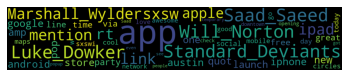

In [12]:
text = [
 'Standard_Deviants',
 'Saad_Saeed',
 'Luke_Dowker',
 'Will_Norton',
 'Marshall_Wylder'
 'sxsw',
 'mention',
 'ipad',
 'link',
 'rt',
 'apple',
 'google',
 'iphone',
 'store',
 'quot',
 'app',
 'new',
 'austin',
 'amp',
 'pop',
 'android',
 'get',
 'launch',
 'one',
 'party',
 'great',
 'line',
 'time',
 'free',
 'via',
 'social',
 'circles',
 'cool',
 'today',
 'day',
 'like',
 'w',
 'maps',
 'mobile',
 'sxswi',
 'go',
 'awesome',
 'good',
 'love',
 'network',
 'opening',
 'downtown',
 'check',
 'temporary',
 'people',
 'apps',
 'got',
 'see',
 'popup',
 'even',
 'Saad']
wc = WordCloud(max_words = 1000,
               width = 1600,
               height = 300,
               collocations=False).generate(",".join(text))
plt.axis("off")
plt.imshow(wc);

In [13]:
word_freq = getTopWordFreq(data_df,'text',10000, sw)
len(word_freq)

8980

In [14]:
data_df['new_text'] = data_df['text'].map(lambda x:doc_preparer(x,stem=False))
data_df

,text,product_name,emotion,new_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,iphone hrs tweeting rise dead need upgrade plu...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,know awesome ipad iphone app likely appreciate...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,hope year's festival crashy year's iphone app ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,great stuff fri sxsw marissa mayer google tim ...
...,...,...,...,...
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad everywhere sxsw link
8717,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,wave buzz rt interrupt regularly scheduled sxs...
8718,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,google's zeiger physician never reported poten...
8719,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,verizon iphone customers complained time fell ...


In [56]:
len(" ".join(data_df['new_text']))

621289

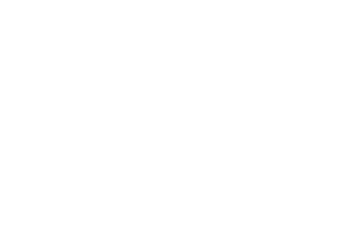

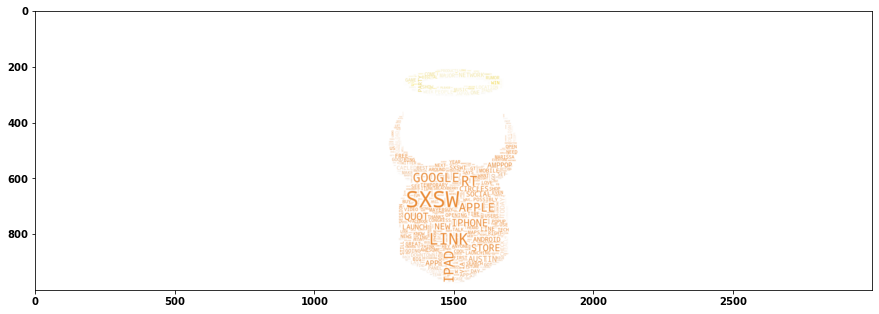

In [85]:
stopwords = set(STOPWORDS)


mask = np.array(Image.open("../../images/Splash Header.png"))
image_colors = ImageColorGenerator(mask)


wc = WordCloud(
    max_words=10000,
    mask=mask,
    stopwords=stopwords,
    background_color="white",
    collocations=False,
    normalize_plurals=False,
    max_font_size=80,
    scale=1
)

wc.generate(" ".join(data_df['new_text'].str.upper()))

wc.recolor(color_func=image_colors, random_state=3)

plt.axis("off")
plt.figure(figsize=(15, 8))

plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

wc.to_file("Header_wc-white.png")

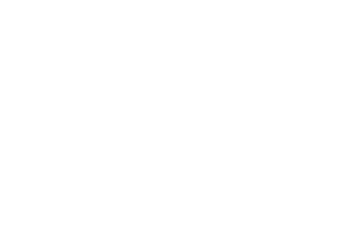

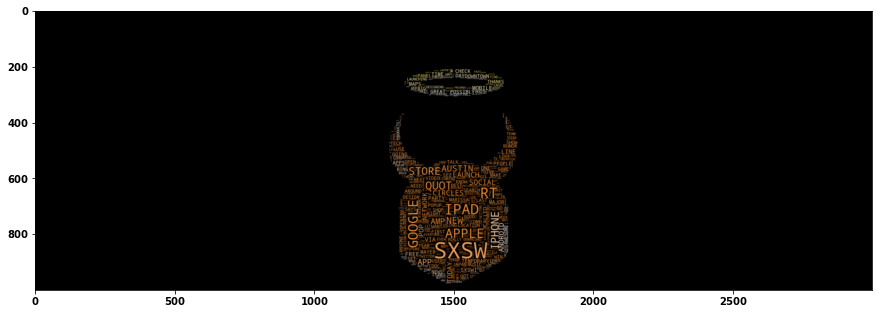

In [86]:
stopwords = set(STOPWORDS)
stopwords
stopwords.update(['link'])


mask = np.array(Image.open("../../images/Splash Header.png"))
image_colors = ImageColorGenerator(mask)


wc = WordCloud(
    max_words=10000,
    mask=mask,
    stopwords=stopwords,
#     background_color="white",
    collocations=False,
    normalize_plurals=False,
    max_font_size=80,
    scale=1
)

wc.generate(" ".join(data_df['new_text'].str.upper()))

wc.recolor(color_func=image_colors, random_state=3)

plt.axis("off")
plt.figure(figsize=(15, 8))

plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

wc.to_file("Header_wc-Black.png")

In [20]:
neg_df = data_df[data_df['emotion']=='Negative emotion']
pos_df = data_df[data_df['emotion']=='Positive emotion']

In [22]:
print('As an example. Here are the top 3 words:')
print(f"Entire DataFrame: {[word for word,freq in getTopWordFreq(data_df,'text',3,stop_words = sw)]}")
print(f"Positive Emotion: {[word for word,freq in getTopWordFreq(pos_df,'text',3,stop_words = sw)]}")
print(f"negative Emotion: {[word for word,freq in getTopWordFreq(neg_df,'text',3,stop_words = sw)]}")

As an example. Here are the top 3 words:
Entire DataFrame: ['sxsw', 'link', 'rt']
Positive Emotion: ['sxsw', 'ipad', 'link']
negative Emotion: ['sxsw', 'ipad', 'quot']


As you can tell, there is going to be a lot of crossover with certain terms (`sxsw`, `ipad` in our example above) which we should remove however, we'd want to retain words that are potentially more identifiable with a certain `emotion`. This is just the top 3 words, and we shall be using a larger set.\
Looking at the top 50 common words in both positive and negative `emotion` tweets, there 31 common words.

In [23]:
num_mostCommon_Words = 50
common_neg_words = [word for word,freq in getTopWordFreq(neg_df, 'text',num_mostCommon_Words,stop_words = sw)]
common_pos_words = [word for word,freq in getTopWordFreq(pos_df, 'text',num_mostCommon_Words,stop_words = sw)]
new_sw_words = list(set(common_neg_words).intersection(set(common_pos_words)))
print(len(new_sw_words))
new_sw_words

31


['day',
 'apple',
 'amp',
 'network',
 'android',
 'pop',
 'apps',
 'circles',
 'rt',
 'store',
 'get',
 'link',
 'one',
 "i'm",
 'launch',
 'good',
 'app',
 'austin',
 'line',
 'like',
 'today',
 'time',
 'quot',
 'people',
 'sxsw',
 'see',
 'google',
 'iphone',
 'ipad',
 'social',
 'new']

We shall be appending this to our stopword list. As part of our `doc_preparer()`, custom function to preprocess text, we shall be removing these words in the future

In [24]:
print(f'Original number of stopwords: {len(sw)}')
sw.extend(new_sw_words)
print(f'New number of stopwords:      {len(sw)}')

Original number of stopwords: 179
New number of stopwords:      210


In [30]:
pos_words = getTopWordFreq(pos_df,'text',5000,stop_words = sw)
neg_words = getTopWordFreq(neg_df,'text',5000,stop_words = sw)

In [32]:
len(pos_words)

4755

In [33]:
len(neg_words)

1942

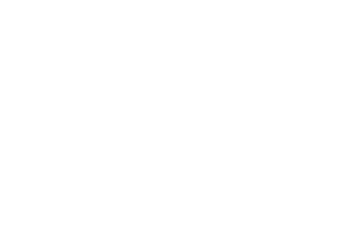

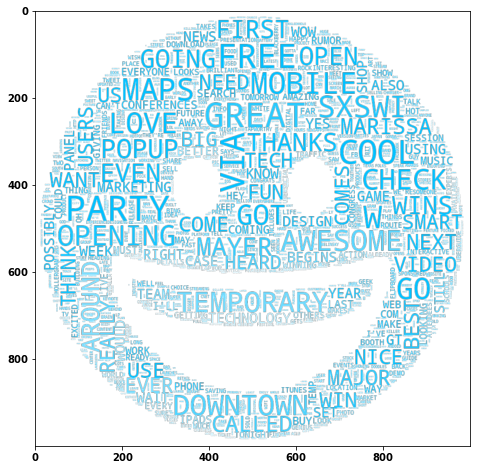

In [37]:
stopwords = set(sw)
stopwords
stopwords.update(['link'])


mask = np.array(Image.open("../../images/Happy.jpg"))
image_colors = ImageColorGenerator(mask)


wc = WordCloud(
    max_words=10000,
    mask=mask,
    stopwords=stopwords,
    mode = 'RGBA', 
    background_color=None,
    collocations=False,
    normalize_plurals=False,
    max_font_size=80,
    scale=1
)

wc.generate(" ".join(pos_df['new_text'].str.upper()))

wc.recolor(color_func=image_colors, random_state=3)

plt.axis("off")
plt.figure(figsize=(15, 8))

plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

wc.to_file("Pos_wc.png")

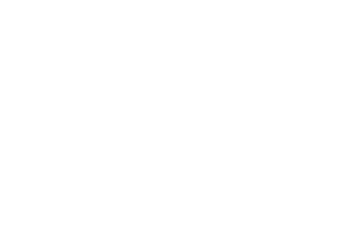

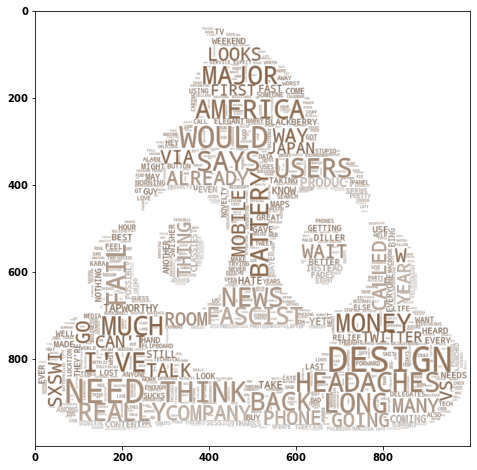

In [40]:
stopwords = set(sw)
stopwords
stopwords.update(['link'])


mask = np.array(Image.open("../../images/Poop.jpg"))
image_colors = ImageColorGenerator(mask)


wc = WordCloud(
    max_words=10000,
    mask=mask,
    stopwords=stopwords,
    mode = 'RGBA', 
    background_color=None,
    collocations=False,
    normalize_plurals=False,
    max_font_size=80,
    scale=1
)

wc.generate(" ".join(neg_df['new_text'].str.upper()))

wc.recolor(color_func=image_colors, random_state=3)

plt.axis("off")
plt.figure(figsize=(15, 8))

plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

wc.to_file("Neg_wc.png")

In [41]:
pos_df

,text,product_name,emotion,new_text
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,know awesome ipad iphone app likely appreciate...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,wait ipad also sale sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,great stuff fri sxsw marissa mayer google tim ...
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,sxsw starting ctia around corner googleio hop ...
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,beautifully smart simple idea rt wrote hollerg...
...,...,...,...,...
8701,@mention your iPhone 4 cases are Rad and Ready...,iPhone,Positive emotion,iphone cases rad ready stop tomorrow get sxsw ...
8706,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion,pr guy convinced switch back iphone great sxsw...
8708,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion,quot papyrus sort like ipad quot nice lol sxsw...
8713,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion,i've always used camera iphone b c image stabi...


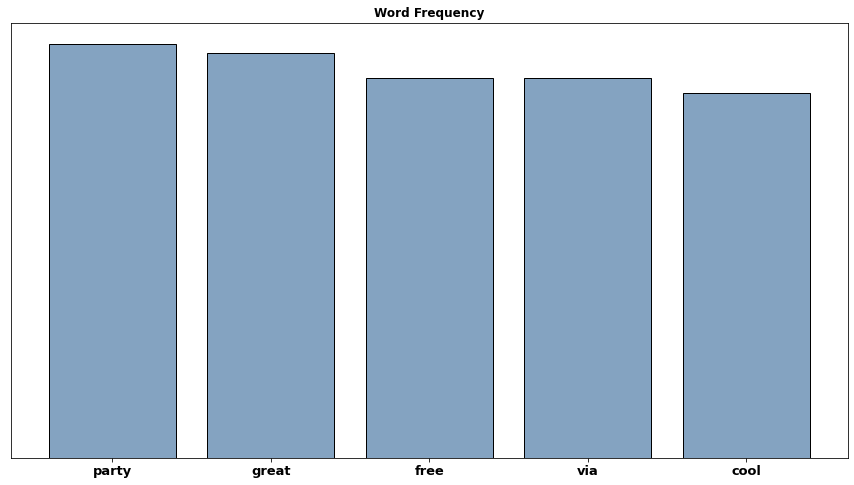

In [61]:
fig, ax = plt.subplots(figsize=(15, 8))
num_of_bars = 5
viz_data = getTopWordFreq(pos_df, 'new_text', n=num_of_bars, stop_words=sw)

plt.xticks(fontsize=13)
plt.yticks([],fontsize=12)
ax.set_title('Word Frequency')

ax.bar(x=[word for word, freq in viz_data],
       height=[(freq/pos_df.shape[0])*100 for word, freq in viz_data],
       color=(0.2, 0.4, 0.6, 0.6),
       edgecolor='black');

plt.savefig('../../images/WordFreqPos_postSW.jpg',dpi='figure', 
            
        
        bbox_inches='tight', 
        facecolor='auto', 
       )